In [1]:
# Import libraries
from scipy.optimize import fsolve
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#settings for plots

#tableau for plots
plt.style.use('tableau-colorblind10')

plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 16        # Default font size for text
plt.rcParams['axes.titlesize'] = 16   # Font size for axes titles
plt.rcParams['axes.labelsize'] = 16   # Font size for x and y labels
plt.rcParams['xtick.labelsize'] = 16  # Font size for x tick labels
plt.rcParams['ytick.labelsize'] = 16  # Font size for y tick labels

In [9]:
#Definitions that enters in the self-consistent equations for critical line
def P_z(z):
    return 1/np.sqrt(2*np.pi)*np.exp(-z**2/2)

def J(x, K):
    return x/(1+K*x)  

def dJdx(x, K):
    return 1/(1+K*x)**2

def f_prim(z, Q, q, chi, mu, sigma, gamma, K):
    eta = np.sqrt(q)*sigma*z
    t = 1+mu*Q+eta
    y = 1-gamma*sigma**2*chi
    return 2*t*(K-(4*K-2*K*(y-K*t))/(2*np.sqrt((y-K*t)**2+4*K*t)))/(K*t-y-np.sqrt((y-K*t)**2+4*K*t))**2-2/(K*t-y-np.sqrt((y-K*t)**2+4*K*t))
 
def x_z(z, Q, q, chi, mu, sigma, gamma, K):
    eta = np.sqrt(q)*sigma*z
    t = 1+mu*Q+eta
    y = 1-gamma*sigma**2*chi
    return -2*t/(K*t-y-np.sqrt((K*t-y)**2+4*K*t))

def Delta(Q, q, sigma):
    return (1+mu*Q)/(np.sqrt(q)*sigma)

def integrand0(z, Q, q, chi, mu, sigma, gamma, K):
    return P_z(z)*J(x_z(z, Q, q, chi, mu, sigma, gamma, K), K)
    
def integrand1(z, Q, q, chi, mu, sigma, gamma, K):
    return P_z(z)*J(x_z(z, Q, q, chi, mu, sigma, gamma, K), K)**2

def integrand2(z, Q, q, chi, mu, sigma, gamma, K):
    return P_z(z)*dJdx(x_z(z, Q, q, chi, mu, sigma, gamma, K), K)* f_prim(z, Q, q, chi, mu, sigma, gamma, K)

def integrand3(z, Q, q, chi, mu, sigma, gamma, K):
    return P_z(z)*(dJdx(x_z(z, Q, q, chi, mu, sigma, gamma, K), K)/(1-gamma*sigma**2*chi*(dJdx(x_z(z, Q, q, chi, mu, sigma, gamma, K), K))))**2

In [10]:
#Critical-line set of self-consistent equations (search for critical sigma)
def equations(y):
    Q = y[0]
    q = y[1]
    chi = y[2]
    sigma = y[3]

    eq0 = Q - sc.integrate.quad(integrand0, -Delta(Q, q, sigma), np.inf, (Q, q, chi, mu, sigma, gamma, K))[0]
    eq1 = q - sc.integrate.quad(integrand1, -Delta(Q, q, sigma), np.inf, (Q, q, chi, mu, sigma, gamma, K))[0]
    eq2 = chi - sc.integrate.quad(integrand2, -Delta(Q, q, sigma), np.inf, (Q, q, chi, mu, sigma, gamma, K))[0]
    eq3 = 1 -sigma**2*sc.integrate.quad(integrand3, -Delta(Q, q, sigma), np.inf, (Q, q, chi, mu, sigma, gamma, K))[0]
    
    return [eq0, eq1, eq2, eq3]

In [12]:
#Example of solution
K = 0.8
mu = -3
gamma = -0.90

initial_guess = [0.176962  , 0.0637427 , 0.17102442, 3.90151825]
solution = fsolve(equations, initial_guess)

solution

/tmp/ipykernel_8522/257278564.py:24: RuntimeWarning: invalid value encountered in sqrt
  return (1+mu*Q)/(np.sqrt(q)*sigma)
/tmp/ipykernel_8522/257278564.py:18: RuntimeWarning: invalid value encountered in sqrt
  eta = np.sqrt(q)*sigma*z
/tmp/ipykernel_8522/2070410665.py:8: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  eq0 = Q - sc.integrate.quad(integrand0, -Delta(Q, q, sigma), np.inf, (Q, q, chi, mu, sigma, gamma, K))[0]
/tmp/ipykernel_8522/2070410665.py:9: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  eq1 = q - sc.integrate.quad(integrand1, -Delta(Q, q, sigma), np.inf, (Q, q, chi, mu, sigma, gamma, K))[0]
/tmp/ipykernel_8522/257278564.py:12: RuntimeWarning: invalid value encountered in sqrt
  eta = np.sqrt(q)*sigma*z
/tmp/ipykernel_8522/207041

array([0.176962  , 0.0637427 , 0.17102442, 3.90151825])

### Phase diagram gamma-sigma

In [31]:
# gamma-sigma phase diagram, mu, K fixed
K_list = [0.1, 0.2, 0.4, 0.8]
mu = -3
gamma_list = np.linspace(-0.90, 1, 191)
sigma_list = []

solution_list = [[ 0.33296945,  0.3460741 ,  0.04327522, 16.33940275],
                 [ 0.33092495,  0.33900596,  0.03648546, 19.37797597],
                 [3.06943897e-01, 2.84746492e-01, 2.47944359e-02, 2.84860175e+01],
                 [2.17487950e-01, 1.37153621e-01, 1.58604762e-02, 4.43580041e+01]]

'''
solution_list = [[0.21378542, 0.12493459, 0.10616707, 6.62959255],
                 [0.2004475 , 0.10136297, 0.13594512, 5.13853204],
                 [0.19007323, 0.08228172, 0.16452709, 4.17746883],
                 [0.176962  , 0.0637427 , 0.17102442, 3.90151825]]
'''

df  = pd.DataFrame(columns = ['mu', 'sigma', 'gamma', 'K', 'Q', 'q', 'chi'])
i = 0
for K in K_list:
    #initial guesses
    initial_guess = solution_list[i]
    i = i +1
    for gamma in gamma_list:
        print(K, gamma)
        # Solve the system numerically
        solution = fsolve(equations, initial_guess)
        df.loc[len(df)] = [mu, solution[3], gamma, K, solution[0], solution[1], solution[2]]
         #initial guesses
        initial_guess = solution

0.1 -0.9
0.1 -0.89
0.1 -0.88
0.1 -0.87
0.1 -0.86
0.1 -0.85
0.1 -0.8400000000000001
0.1 -0.8300000000000001
0.1 -0.8200000000000001
0.1 -0.81
0.1 -0.8
0.1 -0.79
0.1 -0.78
0.1 -0.77
0.1 -0.76
0.1 -0.75
0.1 -0.74
0.1 -0.73
0.1 -0.72
0.1 -0.71
0.1 -0.7
0.1 -0.6900000000000001
0.1 -0.68
0.1 -0.67
0.1 -0.66
0.1 -0.65
0.1 -0.64
0.1 -0.63
0.1 -0.62
0.1 -0.6100000000000001
0.1 -0.6000000000000001
0.1 -0.5900000000000001
0.1 -0.5800000000000001
0.1 -0.5700000000000001
0.1 -0.56
0.1 -0.55
0.1 -0.54
0.1 -0.53
0.1 -0.52
0.1 -0.51
0.1 -0.5
0.1 -0.49
0.1 -0.48000000000000004
0.1 -0.47000000000000003
0.1 -0.46
0.1 -0.45
0.1 -0.44
0.1 -0.43
0.1 -0.42000000000000004
0.1 -0.41000000000000003
0.1 -0.4
0.1 -0.39
0.1 -0.38
0.1 -0.37
0.1 -0.36
0.1 -0.35
0.1 -0.33999999999999997
0.1 -0.32999999999999996
0.1 -0.32000000000000006
0.1 -0.31000000000000005
0.1 -0.30000000000000004
0.1 -0.29000000000000004
0.1 -0.28
0.1 -0.27
0.1 -0.26
0.1 -0.25
0.1 -0.24
0.1 -0.22999999999999998
0.1 -0.21999999999999997
0.1 -0.20

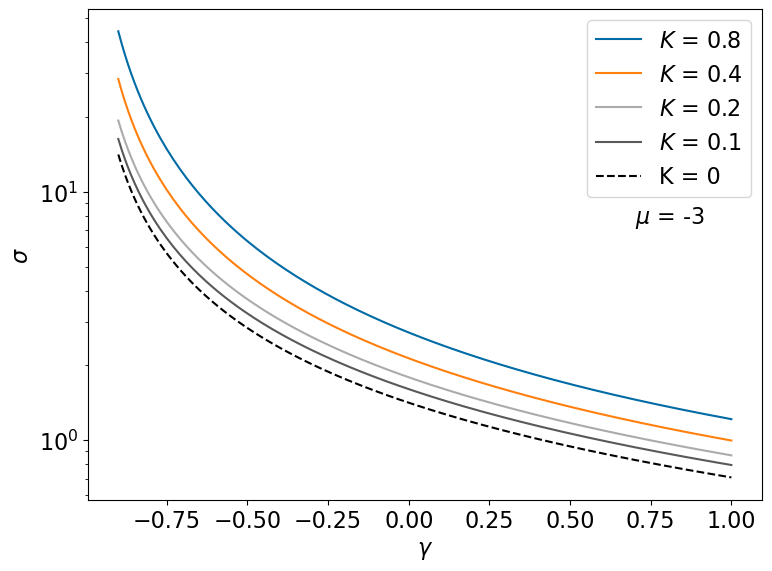

In [37]:
plt.figure(figsize=(8, 6))

#Plot
for K in np.unique(df['K'])[::-1]:
    plt.plot(df['gamma'][df['K']==K], df['sigma'][df['K']==K], label = r'$K$ = {}'.format(K))

plt.plot(gamma_list, np.sqrt(2/(1+gamma_list)**2), label = 'K = 0', color = 'black', linestyle = '--')

plt.xlabel(r'$\gamma$')
plt.ylabel(r'$\sigma$')
plt.legend()

plt.yscale('log')

plt.text(0.7, 7.5, r'$\mu$ = {}'.format(mu))

plt.savefig('results/phase_diagram_gamma_sigma.png', pad_inches = 0.1, bbox_inches = 'tight')

### Phase diagram mu-sigma changing gamma

In [38]:
# mu-sigma phase diagram changing gamma
K_list =[0.1]
mu_list = np.linspace(-5, 5, 100)
gamma_list = [-0.8, -0.5, 0., 0.5, 1]

sigma_list=[]

list_sol = [[0.19992293, 0.12465193, 0.09203362, 7.68292941],
            [0.19982328, 0.12319663, 0.23058733, 3.06606506],
            [0.1996884 , 0.12091618, 0.46244111, 1.52820009],
            [0.19958126, 0.11879196, 0.69496008, 1.01627136],
            [0.19949392, 0.11680252, 0.92771443, 0.76070703]]

df  = pd.DataFrame(columns = ['mu', 'sigma', 'gamma', 'K', 'Q', 'q', 'chi'])
i = 0
for K in K_list:
    for gamma in gamma_list:
        solution = list_sol[i]
        i = i+1
        for mu in mu_list:
            #initial guesses
            initial_guess = solution
            # Solve the system numerically
            solution = fsolve(equations, initial_guess)

            df.loc[len(df)] = [mu, solution[3], gamma, K, solution[0], solution[1], solution[2]]

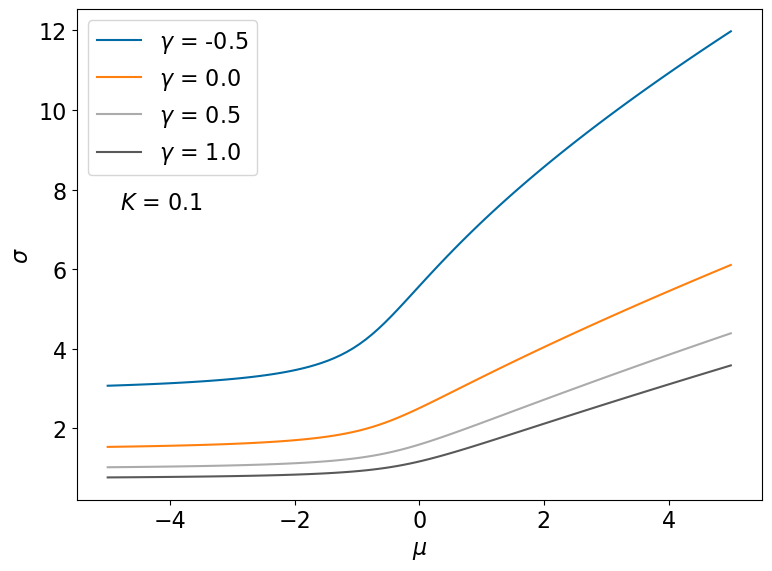

In [48]:
#Plot
plt.figure(figsize=(8, 6))

for gamma in np.unique(df['gamma'])[1:]:
    plt.plot(df['mu'][df['gamma']==gamma], df['sigma'][df['gamma']==gamma], label = r'$\gamma$ = {}'.format(gamma))

#plt.plot(np.linspace(-5, 0, 100), 1/np.sqrt(2)*np.ones(100), label = r'K = 0, $\gamma$ = 0', color = 'black', linestyle = '--')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')
plt.text(-4.8, 7.5, r'$K$ = {}'.format(K))

plt.legend()
plt.savefig('results/phase_diagram_mu_sigma_changing_gamma_K0.1.png', pad_inches = 0.1, bbox_inches = 'tight')
plt.show()

### Mu-sigma phase diagram changing K

In [50]:
# mu-sigma phase diagram changing gamma
K_list =[0.1, 0.2, 0.4, 0.8]
mu_list = np.linspace(-5, 5, 100)
gamma = 0

sigma_list=[]

list_sol = [[0.19992293, 0.12465193, 0.09203362, 7.68292941],
            [0.19982328, 0.12319663, 0.23058733, 3.06606506],
            [0.1996884 , 0.12091618, 0.46244111, 1.52820009],
            [0.19958126, 0.11879196, 0.69496008, 1.01627136]
            ]

df  = pd.DataFrame(columns = ['mu', 'sigma', 'gamma', 'K', 'Q', 'q', 'chi'])
i = 0
for K in K_list:
    solution = list_sol[i]
    i = i+1
    for mu in mu_list:
        #initial guesses
        initial_guess = solution
        # Solve the system numerically
        solution = fsolve(equations, initial_guess)

        df.loc[len(df)] = [mu, solution[3], gamma, K, solution[0], solution[1], solution[2]]

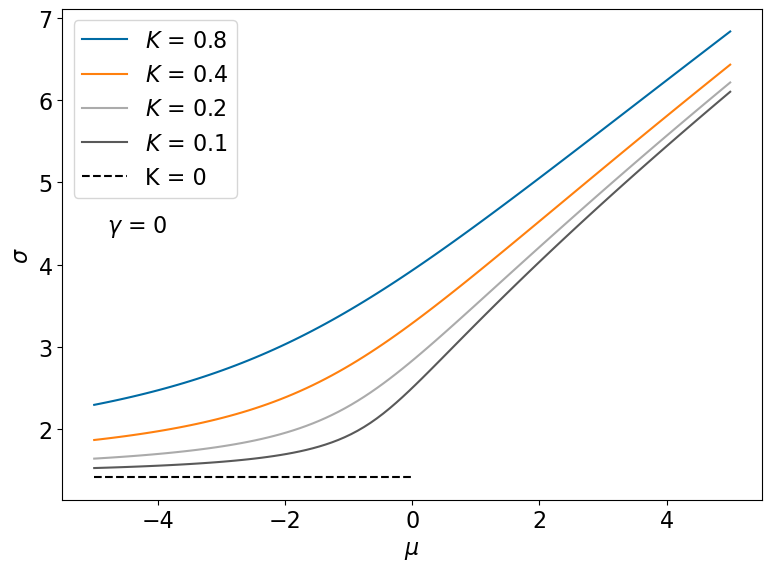

In [62]:
plt.figure(figsize=(8, 6))

plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

#Plot
for K in np.unique(df['K'])[::-1]:
    plt.plot(df['mu'][df['K']==K], df['sigma'][df['K']==K], label = r'$K$ = {}'.format(K))

plt.text(-4.8, 4.4, r'$\gamma$ = {}'.format(gamma))

plt.plot(np.linspace(-5, 0, 100), np.sqrt(2)*np.ones(100), label = r'K = 0', color = 'black', linestyle = '--')
plt.legend()

plt.savefig('results/phase_diagram_mu_sigma_changing_K.png', pad_inches = 0.1, bbox_inches = 'tight')